### Projeto End-to-End

### Etapas

1. Olhar para o quadro geral;
2. Obter os dados;
3. Descobrir e visualizar os dados para obter informações;
4. Preparar os dados para os algoritmos do Aprendizado de Máquina;
5. Selecionar e treinar um modelo;
6. Ajustar o seu modelo;
7. Apresentar sua solução;
8. Lançar, monitorar e manter seu sistema.


### Apendice B
#### Lista de Verificação do Projeto de Aprendizado de Máquina

1. Foque o problema e olhe para o quadro geral;
2. Obtenha os dados;
3. Explore os dados para obter insights;
4. Prepare os dados para melhor expor os padrões de dados subjacentes aos algoritmos do Aprendizado de Máquina;
5. Explore vários diferentes modelos e liste os melhores;
6. Ajuste seus modelos e combine-os em uma ótima solução;
7. Apresente sua solução;
8. Lance, monitore e faça a manutenção de seu sistema.

### Perguntas:

Bem, com toda essa informação você já está pronto para começar a projetar seu sistema. 
Primeiro, você precisa enquadrar o problema: será supervisionado, sem supervisão ou 
um Aprendizado por Reforço? Será uma tarefa de classificação, de regressão ou outra 
coisa? Você deve utilizar técnicas de aprendizado em lote ou online? Antes de ler, pause 
e tente responder para si estas perguntas.


### Respostas:

1. Superviosionado (variável respostas: valor médio do imóvel no bairro)
2. Regressão (prever valor numérico)
3. Lote (não é um variável tão volátil)

### links projetos:

https://github.com/ageron/handson-ml

### Extração dos Dados

In [22]:
import os
from six.moves import urllib
import tarfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

In [3]:
def fetch_house_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")

    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [4]:
fetch_house_data()

In [6]:
def load_housing(housing_path = HOUSING_PATH, file_name = 'housing.csv'):
    housing_path = os.path.join(housing_path, file_name)
    df = pd.read_csv(housing_path)
    return df

In [9]:
housing = load_housing()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [14]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [16]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

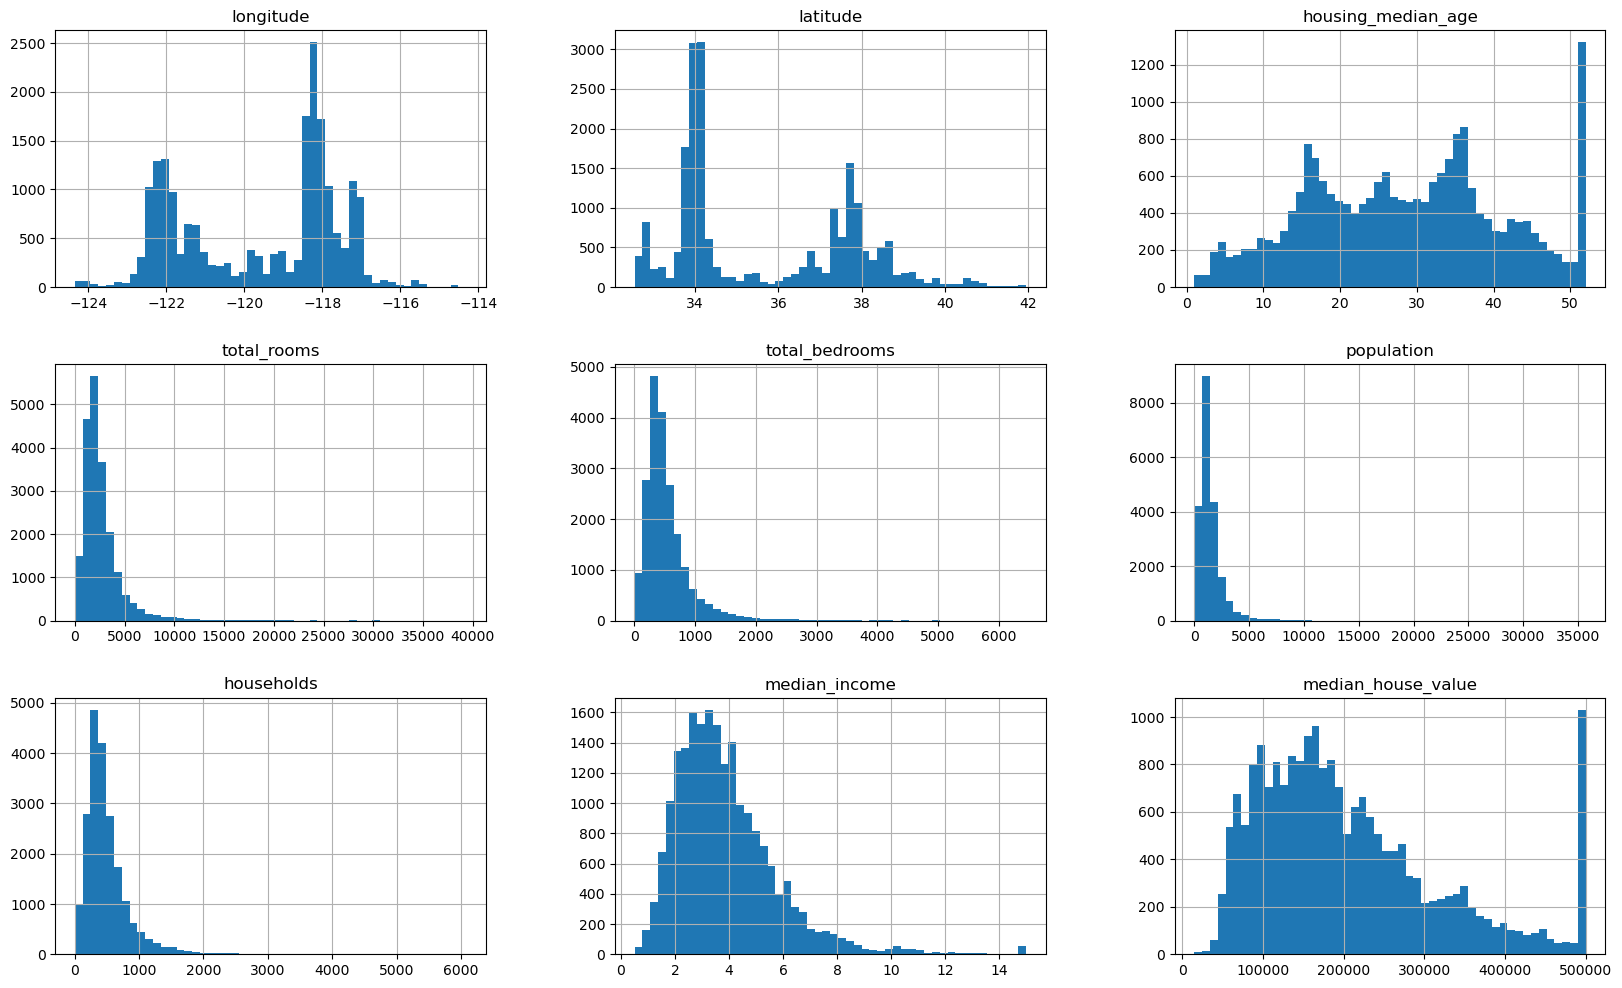

In [21]:
housing.hist(bins = 50, figsize=(20, 12))

### Criando um conjunto de teste

In [23]:
def split_train_test(data, test_ratio):
    shuffled_index = np.random.permutation(len(data))
    test_set_size = int(test_ratio*len(data))
    test_indices = shuffled_index[:test_set_size]
    train_indices = shuffled_index[test_set_size:]

    return data.iloc[train_indices], data.iloc[test_indices]

In [25]:
train, test = split_train_test(housing, 0.2)

In [27]:
test.shape[0], train.shape[0]

(4128, 16512)

pausa pg 72